### The goal of this notebook is to provide a basic example of how to access the USDOT Intelligent Transportation System (ITS) Joint Program Office (JPO) Wyoming Connected Vehcile Pilot data through the Data Program Sandbox.

Objective of the notebook
- Show how to access WY CV pilot data on the sandbox
- Conduct basic analysis with the data

----

### Load key libraries for the work 
**You will need to install these libraries before running this notebook**
- boto3: AWS python library (http://boto3.readthedocs.io/en/latest/)
- pandas: Python Data Analysis Library (http://pandas.pydata.org)

In [1]:
import boto3
import pandas as pd

### Create session and client variable for accessing S3

In [2]:
session = boto3.Session()
client = session.client('s3')

### List sub folders to determine which times on Aug 15 at 23:46 are avaliable

In [3]:
result =  client.list_objects(Bucket = 'usdot-its-cvpilot-public-data', Delimiter='/', Prefix='wydot/BSM/20170815T234600')

print(len(result.get('CommonPrefixes')))

if result.get('CommonPrefixes') is not None:
    for o in result.get('CommonPrefixes'):
        print ('subfolder : ', o.get('Prefix'))
else:
    print('No folder found for that prefix')

17
subfolder :  wydot/BSM/20170815T234600645Z/
subfolder :  wydot/BSM/20170815T234600656Z/
subfolder :  wydot/BSM/20170815T234600667Z/
subfolder :  wydot/BSM/20170815T234600674Z/
subfolder :  wydot/BSM/20170815T23460069Z/
subfolder :  wydot/BSM/20170815T234600715Z/
subfolder :  wydot/BSM/20170815T234600722Z/
subfolder :  wydot/BSM/20170815T234600734Z/
subfolder :  wydot/BSM/20170815T234600753Z/
subfolder :  wydot/BSM/20170815T234600761Z/
subfolder :  wydot/BSM/20170815T234600769Z/
subfolder :  wydot/BSM/20170815T234600783Z/
subfolder :  wydot/BSM/20170815T234600861Z/
subfolder :  wydot/BSM/20170815T2346008Z/
subfolder :  wydot/BSM/20170815T234600902Z/
subfolder :  wydot/BSM/20170815T234600914Z/
subfolder :  wydot/BSM/20170815T234600962Z/


### Function for pulling file keys from the AWS S3 bucket

In [4]:
def dir_keys(client, bucket, prefix='', filekeys=[]):
    """
    Lists all file keys from a given prefix in an S3 bucket.  If no prefix is given all file keys are returned

    :param client: S3 connection object
    :param bucket: Name of bucket to search
    :param prefix: Prefix for a given folder
    :param filekeys: list for filekeys
    :return: updated filekey list with added files from search
    """
    paginator = client.get_paginator('list_objects_v2')
    for result in paginator.paginate(Bucket=bucket, Delimiter='/', Prefix=prefix):
        if result.get('Contents') is not None:
            for file in result.get('Contents'):
                if file.get('Key') != 'unknownDataType':
                    filekeys.append(file.get('Key'))
        if result.get('CommonPrefixes') is not None:
            for subdir in result.get('CommonPrefixes'):
                dir_keys(client, bucket, subdir.get('Prefix'), filekeys)
    return filekeys


### Pull all file keys for Aug 15 2017 at 23:46 and determine the number of files

In [5]:
filekeys = dir_keys(client, 'usdot-its-cvpilot-public-data', 'wydot/BSM/20170815T234600')
print('Total number of files:', str(len(filekeys)))

Total number of files: 17


### Create local directory and download files to do analysis on

In [6]:
# Create local directory
import os
cwd = os.getcwd()
local_directory = cwd + os.sep + 'tmp' + os.sep
if not os.path.exists(local_directory):
    os.makedirs(local_directory)

# Download Files
for file in filekeys:
    client.download_file('usdot-its-cvpilot-public-data', file, local_directory + file.split('/')[-1])
print('{} Files loaded to {}'.format(str(len(os.listdir(local_directory))), '/tmp/'))

18 Files loaded to /tmp/


### Look at one of the raw JSON files

In [7]:
!cat ./tmp/wydot-filtered-bsm-1502840971677.json

{"metadata":{"generatedAt":"2017-08-15T23:46:00.645Z[UTC]","logFileName":"wsmp_20170505_1550_i80_shane.uper","validSignature":false,"sanitized":true,"payloadType":"us.dot.its.jpo.ode.model.OdeBsmPayload","serialId":{"streamId":"8cb698be-bbb9-4fa4-b94b-30e7f1794aa6","bundleSize":1,"bundleId":6,"recordId":3,"serialNumber":0},"receivedAt":"2017-08-15T23:46:00.645Z[UTC]","latency":2,"schemaVersion":1},"payload":{"dataType":"us.dot.its.jpo.ode.plugin.j2735.J2735Bsm","data":{"coreData":{"msgCnt":56,"id":"16C50000","secMark":56100,"position":{"latitude":41.2969523,"longitude":-105.5918290,"elevation":2195.5},"accelSet":{"accelYaw":0.00},"accuracy":{},"speed":20.54,"heading":283.7500,"brakes":{"wheelBrakes":{"leftFront":false,"rightFront":false,"unavailable":true,"leftRear":false,"rightRear":false},"traction":"unavailable","abs":"unavailable","scs":"unavailable","brakeBoost":"unavailable","auxBrakes":"unavailable"},"size":{}},"partII":[{"id":"VEHICLESAFETYEXT","value":{"pathHistory":{"crumbDat

### Reformat it to make it easier to view

In [8]:
import pprint
import json
data = json.loads(open("./tmp/wydot-filtered-bsm-1502840973991.json").read())
pprint.pprint(data)

{'metadata': {'generatedAt': '2017-08-15T23:46:00.674Z[UTC]',
              'latency': 8,
              'logFileName': 'wsmp_20170505_1550_i80_shane.uper',
              'payloadType': 'us.dot.its.jpo.ode.model.OdeBsmPayload',
              'receivedAt': '2017-08-15T23:46:00.674Z[UTC]',
              'sanitized': True,
              'schemaVersion': 1,
              'serialId': {'bundleId': 9,
                           'bundleSize': 1,
                           'recordId': 6,
                           'serialNumber': 0,
                           'streamId': '8cb698be-bbb9-4fa4-b94b-30e7f1794aa6'},
              'validSignature': False},
 'payload': {'data': {'coreData': {'accelSet': {'accelYaw': 0.0},
                                   'accuracy': {},
                                   'brakes': {'abs': 'unavailable',
                                              'auxBrakes': 'unavailable',
                                              'brakeBoost': 'unavailable',
                 

### Combine the JSON files into a single JSON file

In [9]:
import glob

read_files = glob.glob(local_directory + "*.json")
with open(local_directory + "merged_file.json", "w") as outfile:
    data = []
    for f in read_files:
        data.append(open(f, "r").read())
    outfile.write("[" + ','.join(data[1:]) + "]")

### Load file into data structure and remove partII tag as that information will not be used in this analysis
*Data is in J2735 format http://standards.sae.org/j2735_201603/*

In [10]:
from pandas.io.json import json_normalize

file_json = json.load(open(local_directory + "merged_file.json","r"))

# for element in file_json: 
#     del element['partII'] 

result = json_normalize(data=file_json, meta=['metadata', ['payload', 'data']])
result.head()

,metadata.generatedAt,metadata.latency,metadata.logFileName,metadata.payloadType,metadata.receivedAt,metadata.sanitized,metadata.schemaVersion,metadata.serialId.bundleId,metadata.serialId.bundleSize,metadata.serialId.recordId,...,payload.data.coreData.msgCnt,payload.data.coreData.position.elevation,payload.data.coreData.position.latitude,payload.data.coreData.position.longitude,payload.data.coreData.secMark,payload.data.coreData.speed,payload.data.partII,payload.dataType,payload.schemaVersion,schemaVersion
0,2017-08-15T23:46:00.645Z[UTC],2,wsmp_20170505_1550_i80_shane.uper,us.dot.its.jpo.ode.model.OdeBsmPayload,2017-08-15T23:46:00.645Z[UTC],True,1,6,1,3,...,56,2195.5,41.296952,-105.591829,56100,20.54,"[{'id': 'VEHICLESAFETYEXT', 'value': {'pathHis...",us.dot.its.jpo.ode.plugin.j2735.J2735Bsm,1,1
1,2017-08-15T23:46:00.656Z[UTC],1,wsmp_20170505_1550_i80_shane.uper,us.dot.its.jpo.ode.model.OdeBsmPayload,2017-08-15T23:46:00.656Z[UTC],True,1,7,1,4,...,58,2195.6,41.296961,-105.591877,56300,20.62,"[{'id': 'VEHICLESAFETYEXT', 'value': {'pathHis...",us.dot.its.jpo.ode.plugin.j2735.J2735Bsm,1,1
2,2017-08-15T23:46:00.667Z[UTC],1,wsmp_20170505_1550_i80_shane.uper,us.dot.its.jpo.ode.model.OdeBsmPayload,2017-08-15T23:46:00.667Z[UTC],True,1,8,1,5,...,59,2195.6,41.296966,-105.591900,56400,20.62,"[{'id': 'VEHICLESAFETYEXT', 'value': {'pathHis...",us.dot.its.jpo.ode.plugin.j2735.J2735Bsm,1,1
3,2017-08-15T23:46:00.674Z[UTC],8,wsmp_20170505_1550_i80_shane.uper,us.dot.its.jpo.ode.model.OdeBsmPayload,2017-08-15T23:46:00.674Z[UTC],True,1,9,1,6,...,60,2195.7,41.296971,-105.591924,56500,20.62,"[{'id': 'VEHICLESAFETYEXT', 'value': {'pathHis...",us.dot.its.jpo.ode.plugin.j2735.J2735Bsm,1,1
4,2017-08-15T23:46:00.69Z[UTC],13,wsmp_20170505_1550_i80_shane.uper,us.dot.its.jpo.ode.model.OdeBsmPayload,2017-08-15T23:46:00.69Z[UTC],True,1,10,1,7,...,62,2195.7,41.296980,-105.591972,56700,20.82,"[{'id': 'VEHICLESAFETYEXT', 'value': {'pathHis...",us.dot.its.jpo.ode.plugin.j2735.J2735Bsm,1,1


### Do some basic analysis on the speed

In [11]:
result['payload.data.coreData.speed'].describe()

count    17.000000
mean     21.096471
std       0.363334
min      20.540000
25%      20.820000
50%      21.120000
75%      21.400000
max      21.640000
Name: payload.data.coreData.speed, dtype: float64

### Convert time by removing UTC and setting to time value

In [12]:
result['metadata.generatedAt']= result['metadata.generatedAt'].str[:-5]
result['metadata.generatedAt'] = pd.to_datetime(result['metadata.generatedAt'])
result['metadata.generatedAt']

0    2017-08-15 23:46:00.645
1    2017-08-15 23:46:00.656
2    2017-08-15 23:46:00.667
3    2017-08-15 23:46:00.674
4    2017-08-15 23:46:00.690
5    2017-08-15 23:46:00.715
6    2017-08-15 23:46:00.722
7    2017-08-15 23:46:00.734
8    2017-08-15 23:46:00.753
9    2017-08-15 23:46:00.761
10   2017-08-15 23:46:00.769
11   2017-08-15 23:46:00.783
12   2017-08-15 23:46:00.800
13   2017-08-15 23:46:00.861
14   2017-08-15 23:46:00.902
15   2017-08-15 23:46:00.914
16   2017-08-15 23:46:00.962
Name: metadata.generatedAt, dtype: datetime64[ns]

### Plot time vs speed

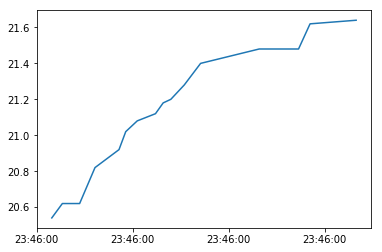

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(result['metadata.generatedAt'], result['payload.data.coreData.speed'])